In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: Isaac Villada
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

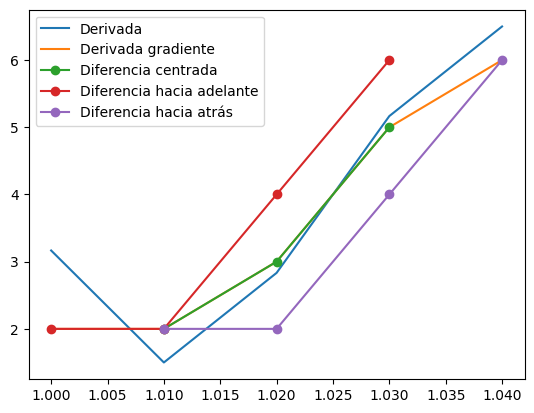

In [ ]:
data = {
    "t": [1.00, 1.01, 1.02, 1.03, 1.04],
    "i": [3.10, 3.12, 3.14, 3.18, 3.24]
}

df = pd.DataFrame(data)

t = df['t']
i = df['i']

def forward_diff(x, y):
    n = len(x)
    df_f = []
    for i in range(n - 1):
        df_f.append((y[i+1] - y[i]) / (x[i+1] - x[i]))
    return np.array(df_f)

def backward_diff(x, y):
    n = len(x)
    df_b = []
    for i in range(1, n):
        df_b.append((y[i] - y[i-1]) / (x[i] - x[i-1]))
    return np.array(df_b)

def centered_diff(x, y):
    n = len(x)
    df_c = []
    for i in range(1, n-1):
        df_c.append((y[i + 1] - y[i - 1]) / (x[i + 1] - x[i - 1]))
    return np.array(df_c)


P = lagrange(t, i)
pol = np.poly1d(P)

x = sp.symbols('x')
f = pol(x)
derivada = sp.diff(f, x)
derivada = sp.lambdify(x, derivada, "numpy")

df_c = centered_diff(t, i)
df_f = forward_diff(t, i)
df_b = backward_diff(t, i)
derivada_vals = derivada(t)

df_c = np.insert(df_c, 0, np.nan)
df_c = np.append(df_c, np.nan)
df_f = np.append(df_f, np.nan)
df_b = np.insert(df_b, 0, np.nan)

derivada_gradiente = np.gradient(i, t)


plt.plot(t, derivada_vals, label='Derivada')
plt.plot(t, derivada_gradiente, label='Derivada gradiente')
plt.plot(t, df_c, label='Diferencia centrada', marker='o')
plt.plot(t, df_f, label='Diferencia hacia adelante', marker='o')
plt.plot(t, df_b, label='Diferencia hacia atrás', marker='o')
plt.legend()

# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

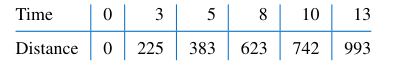



In [ ]:
data = {
    "t": [0, 3, 5, 8, 10, 13],
    "d": [0, 225, 383, 623, 742, 993]
}

df = pd.DataFrame(data)

t = df['t']
d = df['d']

v = np.gradient(d, t)

P = lagrange(t, v)

print(P(12))

81.55800000000855


# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

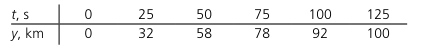

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

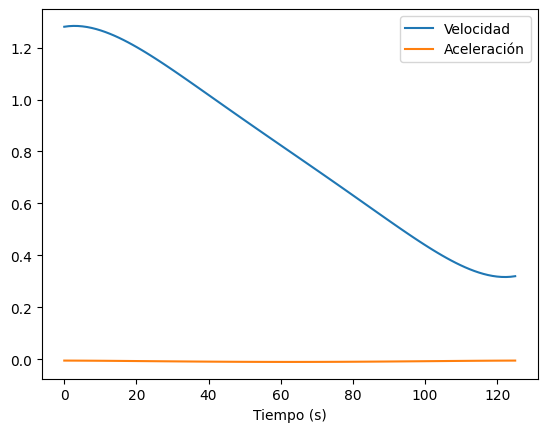

In [ ]:
data = {
    "t": [0, 25, 50, 75, 100, 125],
    "d": [0, 32, 58, 78, 92, 100]
}

df = pd.DataFrame(data)

t = df['t']
d = df['d']

v = np.gradient(d, t)
a = np.gradient(v, t)

velocidad = lagrange(t, v)
aceleracion = lagrange(t, a)

t = np.linspace(0, 125, 100)

plt.plot(t, velocidad(t), label = 'Velocidad')
plt.plot(t, aceleracion(t), label = 'Aceleración')
plt.xlabel('Tiempo (s)')
plt.legend()

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

a: -k*q_tot*z/(z**2 + 1.0e-6)**(3/2)
b: 5.918597809027792e+30


<ipython-input-30-775e92aad027>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


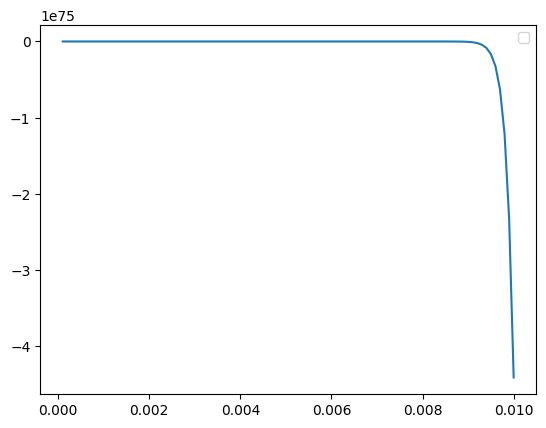

In [ ]:
r = 1e-3

z = sp.symbols('z')
k = sp.symbols('k')
qd = sp.symbols('q_tot')

v = k*qd/sp.sqrt(z**2 + r**2)
vr = v/k*qd
campo = sp.diff(v, z)

print('a:', campo)

z_vals = np.linspace(1e-4, 1e-2, 100)
vr = sp.lambdify(z, vr.subs({k: 1, qd: 1}), 'numpy')
vr_vals = vr(z_vals)

campo_vals = np.gradient(vr_vals, z_vals)
campo = lagrange(z_vals, campo_vals)

print('b:', campo(1e-3))

plt.plot(z_vals, campo(z_vals))
plt.legend()